# HW1 : Data Science in Twitter Data
Ken Morton

## Data Collection: Download Twitter Data using API

* As the first step of Data Science process, let's collect some twitter data. Choose a keyword and search tweets containing the keyword by using Twitter search API, and then download the searched tweets (including the meta data that the Search API returns) in a file. It is recommended that the number of searched tweets should be at least 300.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [1]:
import twitter
import json
from urllib.parse import unquote

# Function used to login to the twitter API
def oauthLogin():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'INSERT_API_KEY_HERE'
    CONSUMER_SECRET = 'INSERT_API_SECRET_KEY_HERE'
    OAUTH_TOKEN = 'INSERT_ACCESS_TOKEN_HERE'
    OAUTH_TOKEN_SECRET = 'INSERT_ACCESS_TOKEN_SECRET_HERE'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitterAPI = twitter.Twitter(auth=auth)
    return twitterAPI

# Login to the twitter API
twitterAPI = oauthLogin();

query = 'celtics' # The term to search twitter with
count = 100 # Number of tweets to retrieve per batch
tweetCount = 0 # Total number of tweets retrieved

print("Retrieving tweets...")

# Search twitter and get statuses
searchResults = twitterAPI.search.tweets(q=query, count=count)
statuses = searchResults['statuses']

# Iterate through 3 more batches of results by following the cursor
for _ in range(3):
    try:
        nextResults = searchResults['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(nextResults[1:]).split("&") ])

    searchResults = twitterAPI.search.tweets(**kwargs)
    statuses += searchResults['statuses']

# Determine how many tweets were retrieved
tweetCount = len(statuses)
print("Finished retrieving ", tweetCount, " tweets, now writing to file.");

# Save to a file
with open('twitterData.json', 'w') as outfile:  
    json.dump(statuses, outfile, indent=4)

Retrieving tweets...
Finished retrieving  387  tweets, now writing to file.


In [2]:
### Report  statistics about the tweets you collected 

In [3]:
print("What keyword did you choose?: ", query)

What keyword did you choose?:  celtics


In [4]:
print("The total number of tweets collected: ", tweetCount)

The total number of tweets collected:  387


# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [5]:
import operator 
import json
from collections import Counter
from prettytable import PrettyTable

# Read in the tweet data
with open('twitterData.json') as file:
    twitterData = json.loads(file.read())

# Obtain the texts of the tweets
statusTexts = [status.get('text') 
                for status in twitterData]

# Obtain list of all the words in the twitter statuses
words = [word 
         for t in statusTexts 
             for word in t.split()]

# Pass our words to a Counter
counter = Counter(words) 
  
# Get the most common words
mostCommonWords = counter.most_common(30)

# Print our data to a nice table
mostCommonWordsTable = PrettyTable()
mostCommonWordsTable.field_names = ["Word", "Count"]

for word in mostCommonWords:
    mostCommonWordsTable.add_row([word[0], word[1]])

print(mostCommonWordsTable)

+-------------------------+-------+
|           Word          | Count |
+-------------------------+-------+
|           the           |  332  |
|         Celtics         |  230  |
|            RT           |  200  |
|            to           |  106  |
|            on           |   97  |
|           and           |   92  |
|            a            |   90  |
|           was           |   73  |
|            he           |   70  |
|            in           |   64  |
|         @celtics        |   53  |
|           when          |   49  |
|           The           |   46  |
|          Devin          |   45  |
|          Booker         |   45  |
|           only          |   45  |
|            70           |   45  |
|           are           |   44  |
|       @SLAMonline:      |   43  |
|            20           |   43  |
|         dropped         |   43  |
| https://t.co/eGqzEnEIFC |   43  |
|          Spurs          |   42  |
|         Aldridge        |   36  |
|            of           | 

** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [6]:
from operator import itemgetter
import textwrap

# Get tweet and its retweet count
retweetData = [{"tweet": item.get('text'), "retweets": int(item.get('retweet_count'))}
               for item in twitterData]

# Sort tweets in descending order by number of retweets
sortedDecending = sorted(retweetData, key=itemgetter("retweets"), reverse=True)

# Print our data to a nice table
retweetTable = PrettyTable()
retweetTable.field_names = ["Tweet", "Retweets"]

for t in sortedDecending[:10]:
    retweetTable.add_row([textwrap.fill(t["tweet"], 75), t["retweets"]])

print(retweetTable)

+----------------------------------------------------------------------------+----------+
|                                   Tweet                                    | Retweets |
+----------------------------------------------------------------------------+----------+
| RT @SLAMonline: Devin Booker was only 20 when he dropped 70 on the Celtics |   3310   |
|                          https://t.co/eGqzEnEIFC                           |          |
| RT @SLAMonline: Devin Booker was only 20 when he dropped 70 on the Celtics |   3310   |
|                          https://t.co/eGqzEnEIFC                           |          |
| RT @SLAMonline: Devin Booker was only 20 when he dropped 70 on the Celtics |   3310   |
|                          https://t.co/eGqzEnEIFC                           |          |
| RT @SLAMonline: Devin Booker was only 20 when he dropped 70 on the Celtics |   3310   |
|                          https://t.co/eGqzEnEIFC                           |          |
| RT @SLAM

**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

In [7]:
# Get hashtags
hashtags = [hashtag.get('text')
            for status in twitterData
                for hashtag in status.get('entities').get('hashtags')]

# Get user mentions
userMentions = [userMention.get('screen_name')
                for status in twitterData
                    for userMention in status.get('entities').get('user_mentions')]

# Get the most common hashtags and user mentions
mostCommonHashtags = Counter(hashtags).most_common(10)
mostMentionedUsers = Counter(userMentions).most_common(10)

# Print our hashtag data to a nice table
hashtagTable = PrettyTable()
hashtagTable.field_names = ["Most Common Hashtags", "Count"]

for h in mostCommonHashtags:
    hashtagTable.add_row([h[0], h[1]])

print(hashtagTable)

# Print our user data to a nice table
mentionedUserTable = PrettyTable()
mentionedUserTable.field_names = ["Most Mentioned Users", "Count"]

for u in mostMentionedUsers:
    mentionedUserTable.add_row([u[0], u[1]])

print(mentionedUserTable)

+----------------------+-------+
| Most Common Hashtags | Count |
+----------------------+-------+
|       Celtics        |   19  |
|  AlabamaCeltics2022  |   11  |
|      future150       |   11  |
|        Spurs         |   10  |
|   BostonSportsNews   |   5   |
|         NBA          |   4   |
|      GoSpursGo       |   4   |
|       CUsRise        |   3   |
|      Showdowns       |   2   |
|      NBANaESPN       |   1   |
+----------------------+-------+
+----------------------+-------+
| Most Mentioned Users | Count |
+----------------------+-------+
|       celtics        |   65  |
|      SLAMonline      |   43  |
|     goknickstape     |   17  |
|        BR_NBA        |   12  |
|       Tom_NBA        |   10  |
|     celticsgreed     |   10  |
|    KeithSmithNBA     |   9   |
|        onlxn         |   9   |
|      ByJayKing       |   8   |
|     JabariJYoung     |   8   |
+----------------------+-------+


Plot a histogram of the number of user mentions in the list using the following bins.

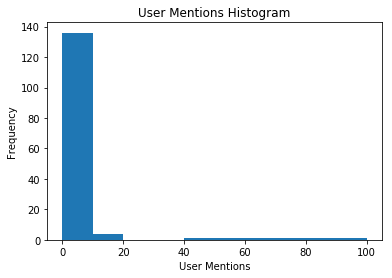

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# Our histogram bins
bins = [0, 10, 20, 30, 40, 50, 100]

# Add a title and axis labels
plt.title("User Mentions Histogram")
plt.ylabel("Frequency")
plt.xlabel("User Mentions")

# Draw a histogram
userMentionCounter = Counter(userMentions)
plt.hist(list(userMentionCounter.values()), bins)

plt.show()

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [11]:
# Get users and their follower count
userAndFollowers = [{"screenName": item.get('user').get("screen_name"), "followersCount": int(item.get('user').get('followers_count'))}
                    for item in twitterData]

# Get the user with the largest number of followers
userWithMostFollowers = max(userAndFollowers, key=lambda x:x['followersCount'])

# The user whose followers and friends we will search for
user = userWithMostFollowers['screenName']

count = 20 # Number of followers/friends to get

# Search twitter for this users followers
print("Getting followers of ", user)
followers = twitterAPI.followers.list(screen_name=user, count=count)

# Get info about this users followers
followersInfo = [{"idNumber": item.get("id"), "screenName": item.get("name")}
                for item in followers['users']]

# Print our data to a nice table
followersTable = PrettyTable()
print("20 followers of the user ", user)
followersTable.field_names = ["ID Number", "Screen Name"]

for f in followersInfo:
    followersTable.add_row([f["idNumber"], f["screenName"]])

print(followersTable)



# Search twitter for this users friends
print("Getting friends of ", user)
friends = twitterAPI.friends.list(screen_name=user, count=count)

# Get info about this users friends
friendsInfo = [{"idNumber": item.get("id"), "screenName": item.get("name")}
                for item in friends['users']]

# Print our data to a nice table
friendsTable = PrettyTable()
print("20 friends of the user ", user)
friendsTable.field_names = ["ID Number", "Screen Name"]

for f in friendsInfo:
    friendsTable.add_row([f["idNumber"], f["screenName"]])

print(friendsTable)

Getting followers of  ABSCBNNews
20 followers of the user  ABSCBNNews
+---------------------+---------------------------------------------+
|      ID Number      |                 Screen Name                 |
+---------------------+---------------------------------------------+
| 1110010003795009536 |                   Kayleng                   |
| 1110018713200132102 |                  Joy Goyon                  |
| 1109995937672265729 |                   Pearlass                  |
| 1024428894743482368 |                rish portento                |
| 1110018206985531392 |                 teammenning                 |
| 1110019010848915456 |               Elbert Bautista               |
| 1110018008787771392 |          Hi-sah Samanoding Macacua          |
| 1110017603303403520 |                  Geraldine                  |
| 1110017369072533504 |                  Chriszel26                 |
| 1110017097625563136 |                 Tin Bensurto                |
| 111001758358178201